In [15]:
# Skewness 

import pandas as pd
import numpy as np
import os 
import sys
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

# Below is the code for skewed data generation 
# a = 4
# Simulated_data = stats.skewnorm.rvs(a, size=1000)

# Load the data generated  
a = 4
data_input_folder = r'C:\Users\Thomas\OneDrive\transfer\Financial Econometric'
SnP = r'export_dataframe.csv'
Simulated_data = pd.read_csv(os.path.join(data_input_folder,SnP))
np_Simulated_data = Simulated_data.to_numpy()


In [16]:
# Statistical Property
print('Mean:',round(np_Simulated_data.mean(),4))
print('Variance:',round(np_Simulated_data.var(),4))
print('Skewness:',round(stats.skew(np_Simulated_data)[0],4))
print('Kurtosis:',round(stats.kurtosis(np_Simulated_data)[0],4))

Mean: 0.7293
Variance: 0.3585
Skewness: 0.7005
Kurtosis: 0.301


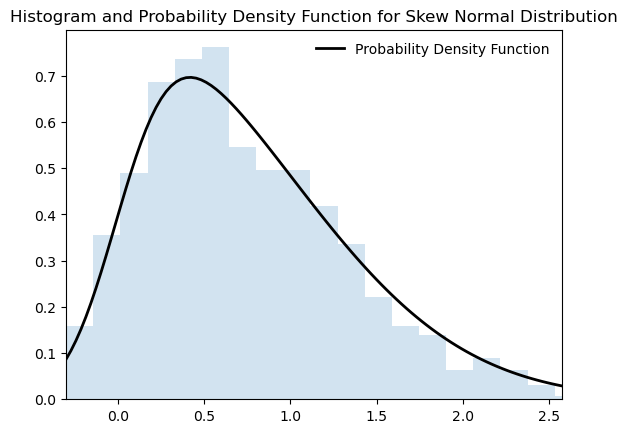

In [17]:
# Plotting the historgram and the probability density function

fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.skewnorm.ppf(0.01, a),
                stats.skewnorm.ppf(0.99, a), 100)

rv = stats.skewnorm(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Probability Density Function')

ax.hist(Simulated_data, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
plt.title("Histogram and Probability Density Function for Skew Normal Distribution")
ax.legend(loc='best', frameon=False)
plt.show()

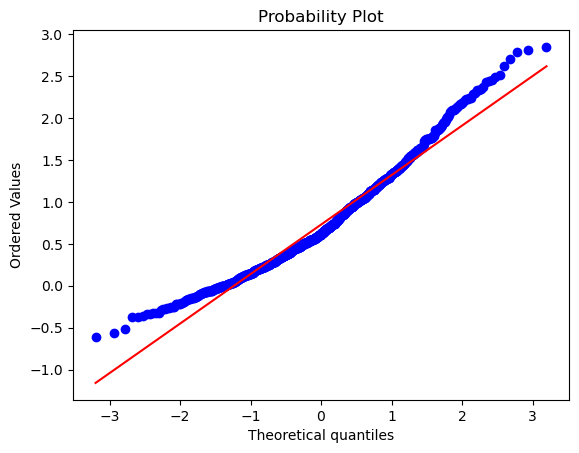

In [18]:
# Plotting the QQ plot 

measurements = np_Simulated_data.reshape(np_Simulated_data.shape[0]*np_Simulated_data.shape[1])

stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

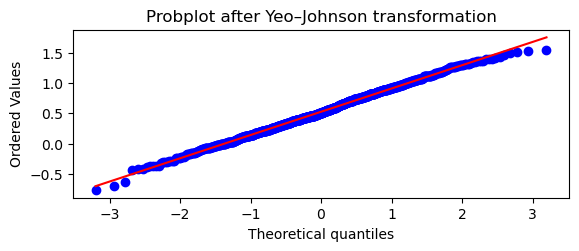

In [19]:
# Variable transformation using Yeo–Johnson transformation and plotting the QQ plot 

fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, lmbda = stats.yeojohnson(measurements)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo–Johnson transformation')

plt.show()

In [20]:
# Over-reliance on the Gaussian distribution
# Get SPY Return Data

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
spy = yf.Ticker("SPY")
spy_price = spy.history(start="2019-11-01", end="2020-01-01")
spy_price['Daily_Return'] = spy_price['Close'].pct_change()
spy_price.dropna(subset=['Daily_Return'], inplace=True)

In [21]:
def plot_data(data: pd.Series):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values)
    plt.title('SPY Daily Return')
    plt.xlabel('Date')
    plt.ylabel('%')
    plt.grid(True)
    plt.show()

In [22]:
def plot_data2(data: pd.Series):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values)
    plt.title('SPY Price')
    plt.xlabel('Date')
    plt.ylabel('Price in USD')
    plt.grid(True)
    plt.show()

In [23]:
daily_return = spy_price['Daily_Return']

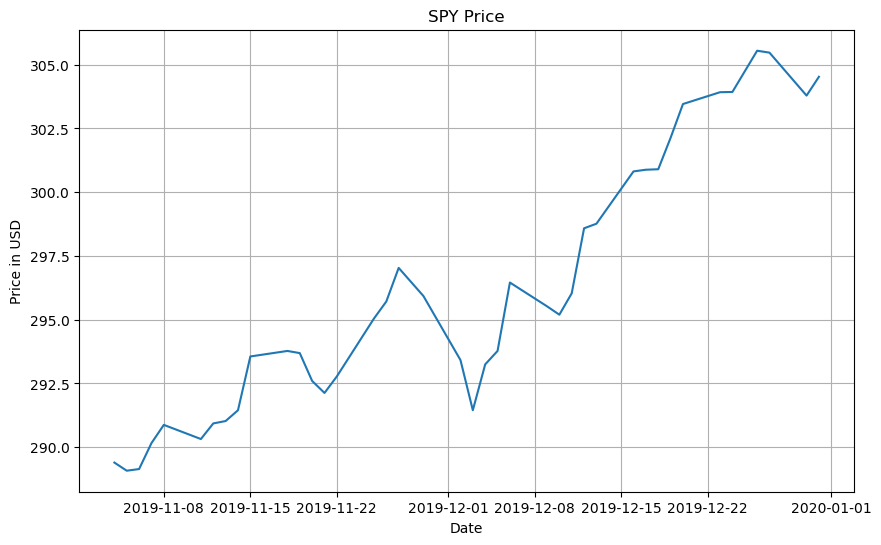

In [24]:
plot_data2(spy_price['Close'])

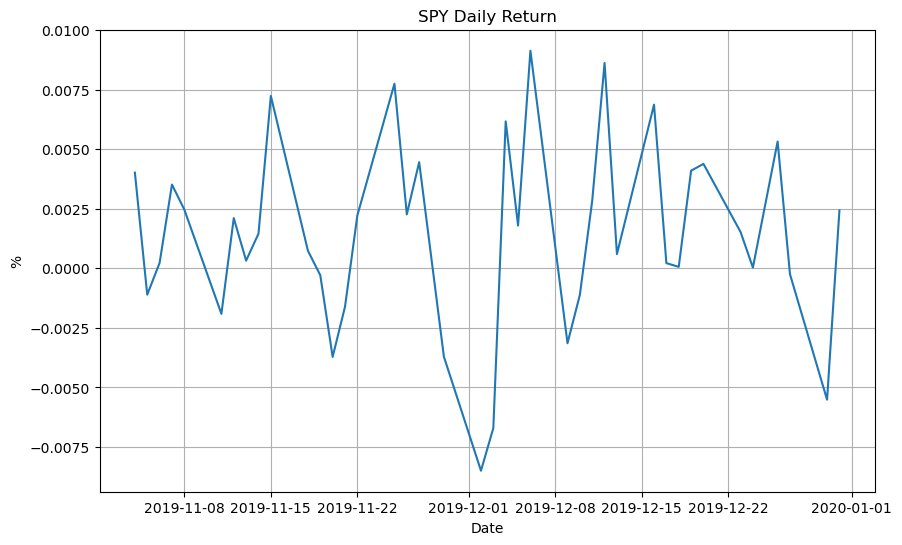

In [25]:
plot_data(spy_price['Daily_Return'])

In [26]:
from scipy.stats import shapiro

shapiro_test_stat, shapiro_p_value = shapiro(daily_return)
print(shapiro_p_value)

0.8256016373634338


In [27]:
# Test hypothesis with one more month of data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
spy = yf.Ticker("SPY")
spy_price = spy.history(start="2019-11-01", end="2020-02-01")
spy_price['Daily_Return'] = spy_price['Close'].pct_change()
spy_price.dropna(subset=['Daily_Return'], inplace=True)
daily_return = spy_price['Daily_Return']

shapiro_test_stat, shapiro_p_value = shapiro(daily_return)
print(shapiro_p_value)

0.0023730946704745293


In [28]:
# Kurtosis
# In this colab notebook we are going to download the NSE NIFTY50 data with the help of yfinance python module.
# First, we are going to transform the data into variance of 150 days window with rolling function in pandas. Then we plot the data and calculate the kurtosis of distribution and see how far the distribution from normal distribution. We are using the varinace because we need positive data when we use methods like box-cox method to convert data into normal distribution
# Second, we are going to look into different tests for kurtosis calcualtion like Jarque–Bera test and Shapiro-Wilk Test. And we are also going to plot the QQ plot to see how far the distribution is from normal.
# And lastly, we are going to use two method namely, Box-Cox Method and Yeo -Johnson Method to convert the distribution to normal distribution.

#Libraries we need to import

import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm
import yfinance as yf
from statsmodels.stats.stattools import jarque_bera
import pylab


import warnings
warnings.filterwarnings("ignore")

In [30]:

# Function "downloadData" downloads the data for us using yfinace module.
# Particularly it downloads and converts into the Adjusted close daily percentage data.
# This function takes three arguments namely-
#   1) ticker : ticker of stock
#   2) start_date : start date from where we want our data
#   3) end_date : we want data upto this date

def downloadData(ticker,start_date,end_date):
    data = yf.download(ticker,start=start_date,end=end_date)
    data["Daily Change"] = data["Adj Close"].pct_change()
    ts_data = pd.Series(data["Daily Change"])
    return ts_data

# Function "timeSeriesRollingdata" converts the data into variance with a particular window of rolling window.
# It also plots the data into histogram and KDE.
# It takes two arguments data and window of rolling we need

def timeSeriesRollingdata(data,window):
    #ts.plot()
    ts_std = data.rolling(window=window).std().pow(2)
    # Std.plot(kind="hist")
    ts_std = ts_std.dropna()
    fig , ax = plt.subplots()
    # Std_normalized = (Std - Std.mean())/Std.std()
    # Std_normalized=Std_normalized.dropna()
    ts_std.plot.kde(ax=ax, legend="variance kde", title='Histogram and KDE distibution')
    ts_std.plot.hist(density=True, ax=ax)
    plt.ylabel("frequency")
    return ts_std

# Function "statData" returns the statistics we want to calculate for our data like kurtosis.
# And also does Jarque-Bera Test and Shapiro-Wilk Test on our data set

def statData(data):
    print(f"Kurtosis : {kurtosis(data)}")
    if type(data) == type(pd.Series()):
        data = data.to_numpy()
    jarque_bera_result = stats.jarque_bera(data)
    shapiro_result = stats.shapiro(data)
    print(f"jarque_bera_result : {jarque_bera_result}")
    print(f"shapiro_result : {shapiro_result}")
    plt.figure(figsize=(7, 7))
    stats.probplot(data, dist="norm", plot=pylab)
    pylab.show()

# Function "normalTransformation" tries to convert our non-normal data into normally distributed data using Box-Cox Method and Yeo-Johnson Method.

def normalTransformation(data):
    boxcox_fitted_data, boxcox_fitted_lambda = stats.boxcox(data.to_numpy())
    yeojohnson_fitted_data, yeojohnson_fitted_lambda = stats.yeojohnson(data.to_numpy())
    fig, ax = plt.subplots(3,1,figsize=(8,10))

  # plotting the original data(non-normal) and
  # fitted data (normal)
    sns.distplot(data, hist = False, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Non-Normal", color ="green", ax = ax[0]).set_title('Original Data',fontsize=10)

    sns.distplot(boxcox_fitted_data, hist = False, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Normal", color ="green", ax = ax[1]).set_title('Box-Cox Transformation Data',fontsize=10)
    sns.distplot(yeojohnson_fitted_data, hist = False, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Normal", color ="green", ax = ax[2]).set_title('Yeo-Johnson Transformation Data',fontsize=10)
    return boxcox_fitted_data,yeojohnson_fitted_data

[*********************100%%**********************]  1 of 1 completed


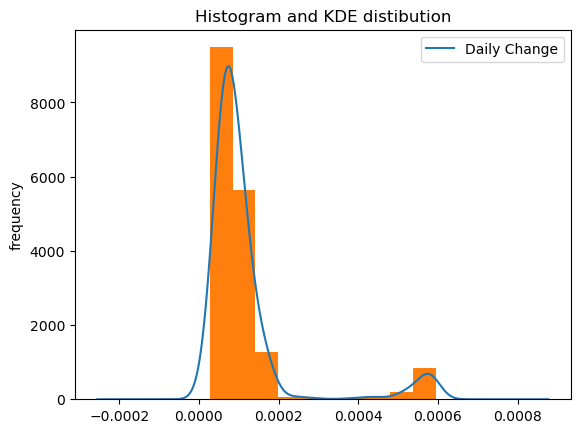

In [31]:
# we are using NSE NIFTY50 for our calculation

data = downloadData(ticker = "^NSEI",start_date="2012-02-01",end_date="2022-02-01")
ts_std_data = timeSeriesRollingdata(data,window=150)

Kurtosis : 8.662512067249745
jarque_bera_result : SignificanceResult(statistic=10844.279350251249, pvalue=0.0)
shapiro_result : ShapiroResult(statistic=0.5308430194854736, pvalue=0.0)


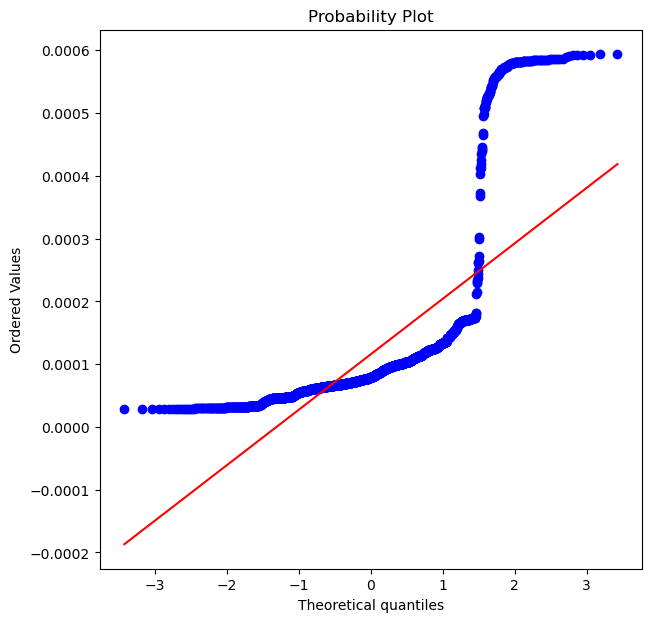

In [32]:
statData(ts_std_data)

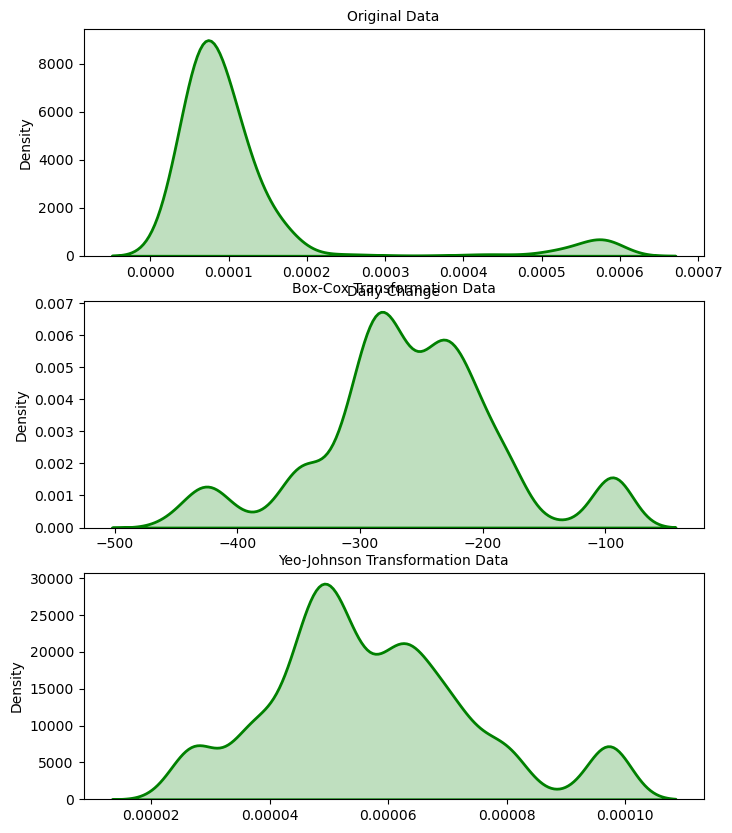

In [33]:
boxcox_data,yeojohnson_data = normalTransformation(ts_std_data)

Kurtosis : 0.5443483162519214
jarque_bera_result : SignificanceResult(statistic=29.057840661324725, pvalue=4.89970657316494e-07)
shapiro_result : ShapiroResult(statistic=0.9658681750297546, pvalue=6.51108688664998e-23)


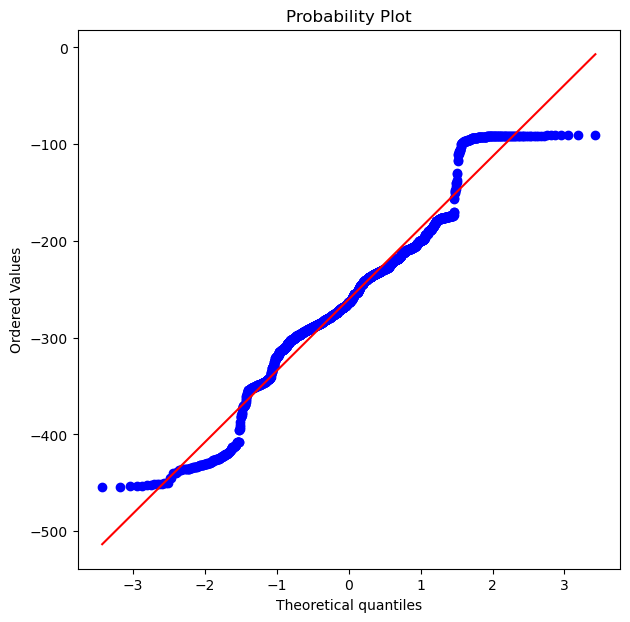

In [34]:
statData(boxcox_data)

Kurtosis : 0.07628351349417217
jarque_bera_result : SignificanceResult(statistic=102.82881464894119, pvalue=4.6882051612970857e-23)
shapiro_result : ShapiroResult(statistic=0.9623778462409973, pvalue=5.390991018163536e-24)


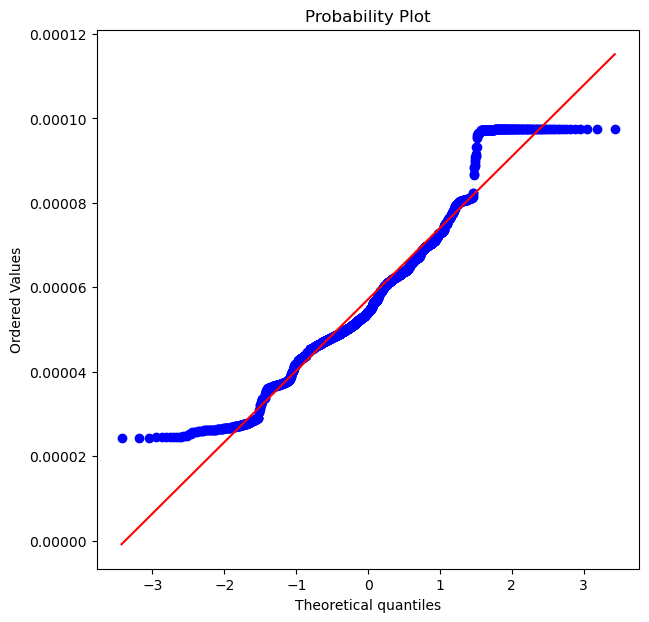

In [35]:
statData(yeojohnson_data)

In [36]:
# Conclusion
# From values of p-value and kurtosis we can see we conveted our non-normal distibuted data into normal distibution at greater extend.

In [38]:
# Sensitivity to outliers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate 25 random points
np.random.seed(42)
n = 25
x = np.random.uniform(0, 5, n)
y = 3 + 4 * x + np.random.normal(0, 1, n)

# Add outlier at (6, 5)
x_with_out = np.append(x, 6)
y_with_out = np.append(y, 5)


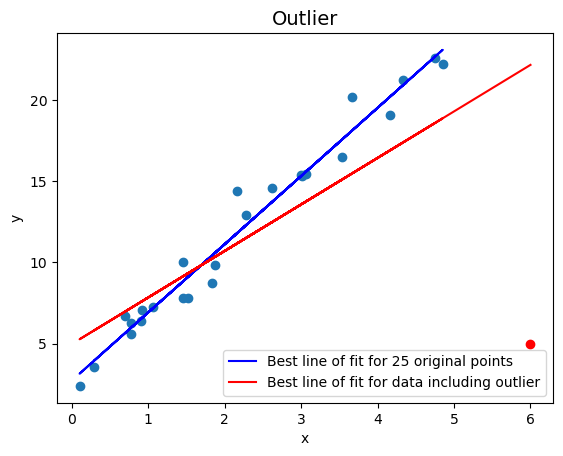

In [39]:
plt.title("Outlier", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(6, 5, "ro")  # Outlier in red

# line of fit for original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 25 original points")

# line of fit for original points+outlier
(ao, bo) = np.polyfit(x_with_out, y_with_out, 1)
plt.plot(
    x_with_out,
    ao * x_with_out + bo,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

In [46]:
# Fit the model without outliers 

df_old = pd.DataFrame({'x':x, 'y':y})
result_old = smf.ols('y~x', data=df_old).fit()

result_old.summary2().tables[1]


Coef.  Std.Err.          t         P>|t|    [0.025   0.975]
Intercept  2.714168  0.391453   6.933572  4.554585e-07  1.904385  3.52395
x          4.203180  0.150005  28.020184  2.792228e-19  3.892870  4.51349

In [47]:
# Fit the model with outliers 

df = pd.DataFrame({'x_out':x_with_out, 'y_out':y_with_out})
result = smf.ols('y_out~x_out', data=df).fit()

result.summary2().tables[1]

Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
Intercept  4.971187  1.486886  3.343354  0.002709  1.902404  8.039969
x_out      2.867403  0.527920  5.431511  0.000014  1.777830  3.956977

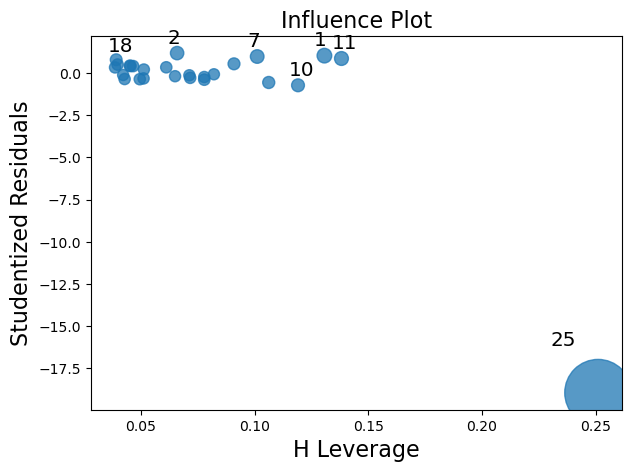

In [43]:
# Cook's Distance Plot  

fig = sm.graphics.influence_plot(result, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=1.0)

In [41]:
# Cook's Distance Summary

influence = result.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

dfb_Intercept      dfb_x   cooks_d  standard_resid  hat_diag  \
25       6.053111 -10.089900  3.780232       -4.749064  0.251061   
1       -0.160530   0.335600  0.079601        1.029228  0.130653   
11      -0.144133   0.292947  0.060108        0.865963  0.138163   
7       -0.103938   0.258316  0.053951        0.979594  0.101079   
2       -0.036640   0.202299  0.048404        1.171922  0.065846   
10      -0.266811   0.219563  0.036325       -0.733255  0.119038   
6       -0.192402   0.153939  0.019129       -0.567574  0.106152   
12      -0.047501   0.131159  0.015363        0.554441  0.090869   
18       0.102992  -0.019316  0.012809        0.794109  0.039039   
5       -0.111785   0.081038  0.006731       -0.399486  0.077797   
17       0.040668   0.017750  0.005390        0.510940  0.039658   
3        0.017998   0.036295  0.004652        0.444005  0.045065   
20       0.014078   0.037831  0.004292        0.419617  0.046489   
8        0.016560   0.035162  0.004231        0.422197  0.045320   
9       -0.006094   0.052769  0.003904        0.346480  0.061073   
16      -0.073104   0.039158  0.003586       -0.371429  0.049423   
14      -0.076944   0.053872  0.003260       -0.290800  0.071592   
23      -0.059084   0.023769  0.002924       -0.361912  0.042746   
22      -0.066206   0.036849  0.002855       -0.325689  0.051081   
4       -0.067168   0.048692  0.002441       -0.240563  0.077791   
24       0.039054  -0.002976  0.002290        0.338046  0.038539   
13      -0.047342   0.031590  0.001275       -0.191592  0.064947   
19       0.043582  -0.024324  0.001238        0.214137  0.051211   
15      -0.035517   0.024810  0.000698       -0.134878  0.071230   
0       -0.018586   0.007074  0.000302       -0.117268  0.042097   
21      -0.021575   0.015955  0.000250       -0.074794  0.082040   

    dffits_internal  student_resid     dffits  
25        -2.749630     -18.937787 -10.964667  
1          0.399002       1.030558   0.399517  
11         0.346723       0.861293   0.344853  
7          0.328485       0.978735   0.328197  
2          0.311138       1.181553   0.313695  
10        -0.269538      -0.725995  -0.266869  
6         -0.195594      -0.559391  -0.192774  
12         0.175288       0.546277   0.172707  
18         0.160058       0.787808   0.158788  
5         -0.116030      -0.392381  -0.113966  
17         0.103830       0.502925   0.102201  
3          0.096454       0.436452   0.094814  
20         0.092655       0.412297   0.091038  
8          0.091988       0.414851   0.090388  
9          0.088367       0.340037   0.086723  
16        -0.084692      -0.364658  -0.083149  
14        -0.080752      -0.285180  -0.079192  
23        -0.076479      -0.355263  -0.075073  
22        -0.075565      -0.319538  -0.074138  
4         -0.069868      -0.235782  -0.068480  
24         0.067680       0.331719   0.066413  
13        -0.050494      -0.187702  -0.049469  
19         0.049750       0.209829   0.048749  
15        -0.037352      -0.132088  -0.036580  
0         -0.024584      -0.114832  -0.024073  
21        -0.022360      -0.073228  -0.021892